In [ ]:
# SAp CTA data pipeline XPs

In [1]:
%%html
<div id="toc"></div>

In [2]:
%%javascript
var toc = document.getElementById("toc");
toc.innerHTML = "<b>Table of contents:</b>";
toc.innerHTML += "<ol>"

var h2_list = document.getElementsByTagName("h2");
for (var i = 0; i < h2_list.length; i++) {
    var h2 = h2_list[i];
    var h2_str = h2.textContent.slice(0, -1);  // "slice(0, -1)" remove the last character 
    toc.innerHTML += "<li><a href=\"#" + h2_str.replace(/\s+/g, '-') + "\">" + h2_str + "</a></li>";
}

toc.innerHTML += "</ol>"

<IPython.core.display.Javascript object>

## Import directives

In [2]:
%matplotlib notebook
#%matplotlib inline

pylab.rcParams['figure.figsize'] = (16, 9)

import scipy
import scipy.stats
import math
import numpy as np
import pandas as pd

import ipywidgets
from ipywidgets import interact

#import common_functions as common

Populating the interactive namespace from numpy and matplotlib


## TODO

### Top priority

- *TC ref.* vs *WT ref.* on $\Delta_\psi$:
    - plot the ratio of the two histograms
    - set bin size to 0.1°
    - check the gain ratio in the first bin: how much do we increase the number of events reconstructed with a shower angle precision less than 0.1°
- Plot *Epsilon_2 . npe* vs *npe*

### Misc

* Howto make (personalized) Reveal.js slides from this notebook: https://forum.poppy-project.org/t/utiliser-jupyter-pour-des-presentations-etape-par-etape-use-jupyter-to-present-step-by-step/2271/2

## Pandas test...

In [41]:
df = pd.read_csv("xps/2017_02_04/xps_2017_02_04.csv")

In [42]:
#grp = df.groupby('Type')
#grp['Dshape'].plot.hist(alpha=0.2, bins=100, legend=True)

#df.loc[]
#grp = df.select('Type')
ref = df[df.Type == 'Ref']
ref_gamma = ref[ref.Part == 0]
ref_proton = ref[ref.Part == 1]

inp = df[df.Type == 'Input']
inp_gamma = inp[inp.Part == 0]
inp_proton = inp[inp.Part == 1]

tc = df[df.Type == "Tailcut-5-10-kill"]
tc_gamma = tc[tc.Part == 0]
tc_proton = tc[tc.Part == 1]

wt = df[df.Type == "Wavelets-n4-K-k-C1-s3-m3-kill"]
wt_gamma = wt[wt.Part == 0]
wt_proton = wt[wt.Part == 1]

In [45]:
ref_gamma.columns

Index(['Part', 'Id', 'Evt', 'Tel', 'Exect', 'Xtel', 'Ytel', 'Ztel', 'E',
       'Theta', 'Phi', 'X', 'Y', 'Z', 'peSum', 'Type', 'Success', 'hX', 'hY',
       'hLength', 'hWidth', 'hSize', 'hPsi', 'hSkew', 'hCurt', 'hDist',
       'border', 'peMax1', 'peMin', 'nPix', 'Dshape', 'Denergy'],
      dtype='object')

In [ ]:
wt_gamma.groupby('Success').count()

In [ ]:
tc_gamma.groupby('Success').count()

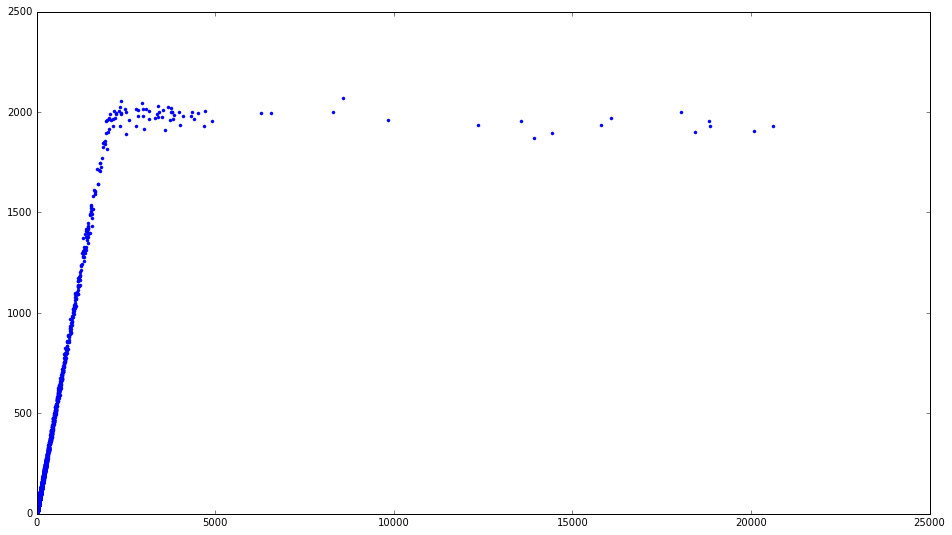

In [43]:
plt.hist(ref_gamma['hPsi'] - ref_gamma['hPsi'])

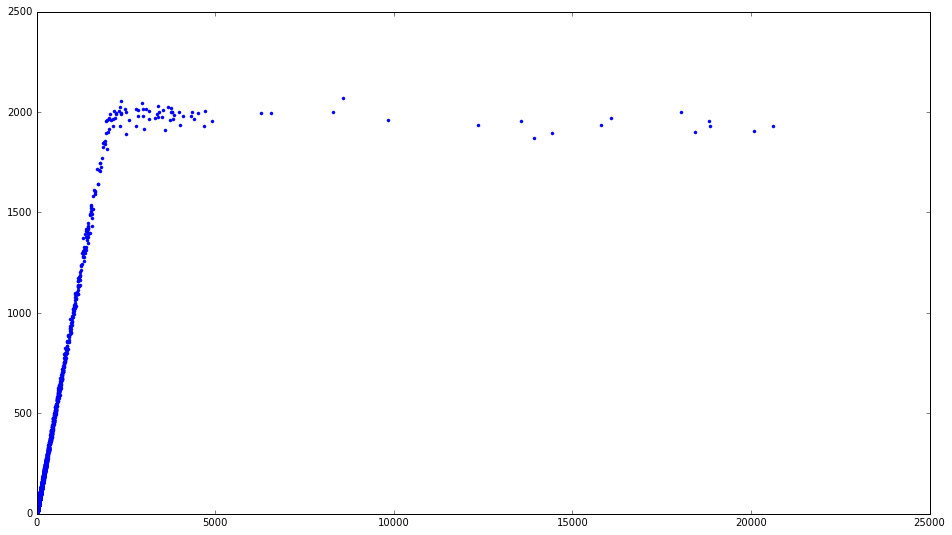

In [43]:
plt.plot(ref_gamma['peMax1'], wt_gamma['peMax1'], ".")

In [ ]:
x = ref_gamma.reset_index(drop=True)['peMax1'].values
y = wt_gamma.reset_index(drop=True)['peMax1'].values
#x = ref_gamma.reset_index(drop=True)['peSum'].values
#Y = wt_gamma.reset_index(drop=True)['peSum'].values
y = y[x < 2000]
x = x[x < 2000]

y = y[x > 100]
x = x[x > 100]

plt.plot(x, y, '.')

#b = wt_gamma[ref_gamma.peMax1 < 2000]
#print(len(a['peMax1']))
#print(len(b['peMax1']))
scipy.stats.linregress(x, y)

In [ ]:
#x = ref_gamma.reset_index(drop=True)['peMax1'].values
#y = tc_gamma.reset_index(drop=True)['peMax1'].values
x = ref_gamma.reset_index(drop=True)['peSum'].values
y = tc_gamma.reset_index(drop=True)['peSum'].values
y = y[x < 2000]
x = x[x < 2000]

y = y[x > 500]
x = x[x > 500]

plt.plot(x, y, '.')

#b = wt_gamma[ref_gamma.peMax1 < 2000]
#print(len(a['peMax1']))
#print(len(b['peMax1']))
scipy.stats.linregress(x, y)

In [ ]:
plt.plot(ref_gamma['peMax1'], tc_gamma['peMax1'], ".")

In [ ]:
ref_gamma.plot.scatter('X', 'Y', alpha=0.2) #, s=5)

In [ ]:
ref_proton.plot.scatter('X', 'Y', alpha=0.2)

In [ ]:
ref.plot.scatter('Xtel', 'Ytel', c='Ztel')

In [ ]:
inp_gamma.peSum.plot.hist(alpha=0.2, bins=100, legend=True)

In [ ]:
df.index

In [ ]:
df.columns

In [ ]:
#df.describe

In [ ]:
df.groupby('Type').count()

In [ ]:
%run ./utils/plot_image_in_meter.py testset/gamma/jeanluc/run1001.simtel.gz_TEL001_EV131903.fits

## ASTRI mini-array configuration


- 38 telescopes:
    - 33 ASTRI telescopes
    - 5 FlashCam telescopes
- Events:
    - 40204 $\gamma$-rays
    - 7580 protons
- $\gamma$-rays and protons are stored in separate files


![image](./figs/astri_mini_array_labelled.png)

### ASTRI telescopes

- Telescopes 1 to 33
- 2368 (rectangular) pixels
- Optical focal length: 2.15m
- Pixel size: ~7.13mm x ~7.13mm

![image](./figs/geom_4_astri.png)

<img src="./figs/astri_mini_array_astri.png" width="60%">

### ASTRI telescopes - cropped images

![image](./figs/geom_4_astri_crop3.svg)

### FlashCam telescopes

- Telescopes 34 to 38
- 1764 (hexagonal) pixels
- Optical focal length: 16.0m

![image](./figs/geom_3_flashcam.png)

### FlashCam telescopes

<img src="./figs/astri_mini_array_flashcam.png" width="60%">

## Toolchain

### Toolchain overview

![image](./figs/workflow.svg)

- This is an overview of the toolchain
- We work with montecarlo simulations that give us simtel files
- I extract all images contained in these files into FITS files
- I use these FITS files as input of my image cleaning library
- It generate JSON files that can be converted to CSV or FITS

- Data: monte-carlo simulation
- Simulation setup: ASTRI mini-array (for convenience)
- Software:
    - "Offline" preprocessing (simtel to FITS)
        - https://github.com/jdhp-sap/sap-cta-data-pipeline/blob/master/utils/simtel_to_fits_astri.py
    - Image cleaning and benchmark
        - https://github.com/jdhp-sap/sap-cta-data-pipeline/blob/master/datapipe/denoising/wavelets_mrfilter.py
    - Required libraries
        - ctapipe: https://github.com/cta-observatory/ctapipe
        - pyhessio: https://github.com/cta-observatory/pyhessio
        - ISAP v3.1 http://www.cosmostat.org/wp-content/uploads/2014/12/ISAP_V3.1.tgz (see http://www.cosmostat.org/software/isap/)
        - Tino's scripts for reconstruction: https://github.com/tino-michael/tino_cta

## Image cleaning guidelines

For detailed procedure, see:

https://github.com/jdhp-sap/sap-cta-data-pipeline#image-cleaning-guidelines

### Step 1: Make data

Extract images from Simtel files, crop them, convert them to “regular” 2D
images and write them into fits files (one fits file per image with the ADC
signal in HDU0 and the photoelectron signal in HDU1):

1. clone http://github.com/jdhp-sap/snippets
2. check snippets/ctapipe/extract_and_crop_simtel_images.py on lines 64 and 66, these lines may need to be fixed
3. in ``snippets/ctapipe`` run:

    ./extract_crop_and_plot_all_astri_images.sh ASTRI_SIMTEL_FILE

Step 1.3 generate a lot of fits files in your current directory ; its execution
may be long (up to several hours) as the script is not optimized at all and
many instructions are redundant (but this is not a big deal because you only
need to run it once to generate your input files).

### Step 2: Install the wavelet library

Install mr_transform (the cosmostat wavelet transform tool):

1. download http://www.cosmostat.org/wp-content/uploads/2014/12/ISAP_V3.1.tgz (see http://www.cosmostat.org/software/isap/)
2. unzip this archive, go to the “sparse2d” directory and compile the sparse2d library. It should generate an executable named “mr_transform”:

```
tar -xzvf ISAP_V3.1.tgz
cd ISAP_V3.1/cxx
tar -xzvf sparse2d_V1.1.tgz
cd sparse2d
compile the content of this directory
```

### Step 3: Clean images generated in step 1

1. clone and install http://github.com/jdhp-sap/data-pipeline-standalone-scripts (see https://github.com/jdhp-sap/data-pipeline-standalone-scripts#installation)
2. to clean one fits file (see for instance run_experiments.sh):
    - with Tailcut : in data-pipeline-standalone-scripts, run ./datapipe/denoising/tailcut.py -T 0.75 -t 0.5 FITS_FILE (-T = max threshold, -t = min threshold, use the -h option to see command usage)
    - with FFT : in data-pipeline-standalone-scripts, run ./datapipe/denoising/fft.py -s -t 0.02 FITS_FILE (-t = threshold in the Fourier space, use the -h option to see command usage)
    - with Wavelets : in data-pipeline-standalone-scripts, run ./datapipe/denoising/wavelets_mrtrransform.py FITS_FILE (use the -h option to see command usage)
3. instead of the step 3.2, the “benchmark mode” can be set to clean images and assess cleaning algorithms (it’s still a bit experimental) : use the same instructions than for step 3.2 with the additional option “-b 1” in each command (and put several fits files in input e.g. “*.fits”)

### Step 4: Plot results

Optionally, plot some stats about scores: in data-pipeline-standalone-scripts/utils, use the plot_score_*.py scripts on the JSON files generated in step 3.3 (use the -h option to see command usage)


## Setup

- ASTRI mini-array (calibrated data)
- Telescopes 1 to 33 only (ASTRI)

### MC simulations

#### Gamma

Number of events per simtel files:

| File                       | Num. events |
| -------------------------- |:-----------:|
| *gamma/run_1001.simtel.gz* | 4461        |
|  gamma/run_1002.simtel.gz  | 4567        |
|  gamma/run_1003.simtel.gz  | 4425        |
|  gamma/run_1004.simtel.gz  | 4401        |
|  gamma/run_1005.simtel.gz  | 4451        |
|  gamma/run_1006.simtel.gz  | 4451        |
|  gamma/run_1007.simtel.gz  | 4614        |
|  gamma/run_1008.simtel.gz  | 4423        |
|  gamma/run_1009.simtel.gz  | 4411        |

#### Proton

Number of events per simtel files:

| File                       | Num. events |
| -------------------------- |:-----------:|
| proton/run_10000.simtel.gz | 747         |
| proton/run_10001.simtel.gz | 680         |
| proton/run_10002.simtel.gz | 763         |
| proton/run_10003.simtel.gz | 792         |
| proton/run_10004.simtel.gz | 763         |
| proton/run_10005.simtel.gz | 776         |
| proton/run_10006.simtel.gz | 738         |
| proton/run_10007.simtel.gz | 749         |
| proton/run_10008.simtel.gz | 760         |
| proton/run_10009.simtel.gz | 812         |

### Subset of events used for experiments

Only one simtel file is used for presented results:

```
sapcta:/dsm/manip/cta/DATA/astri\_mini\_array/gamma/run1001.simtel.gz
```

FITS files made form this Simtel file are stored in:

```
sapcta:/dsm/manip/cta/DATA/astri\_mini\_array/fits/gamma/
```

This subset contains:
- 4461 events from 118 GeV to 256 TeV (Gamma events only)
- 14899 images

### Calibration

https://drf-gitlab.cea.fr/jdecock/sap-cta-data-pipeline/blob/master/datapipe/io/montecarlo_calibration_astri.py

In [23]:
import ctapipe
from ctapipe.io.hessio import hessio_event_source
import pyhessio

/Users/jdecock/anaconda/envs/cta/lib/python3.5/site-packages/PIL/Image.py:85: RuntimeWarning: The _imaging extension was built for another  version of Pillow or PIL
  warnings.warn(str(v), RuntimeWarning)


In [24]:
# %load -s get_mc_calibration_data datapipe/io/montecarlo_calibration_astri.py
def get_mc_calibration_data(tel_id):
    """
    Get the calibration coefficients from the MC data file to the data.
    This is ahack (until we have a real data structure for the calibrated
    data), it should move into `ctapipe.io.hessio_event_source`.

    Parameters
    ----------
    tel_id : int
        The ID of the telescope to process. 

    Returns
    -------
    tuple of Numpy array
        A tuble containing 2 elements: ``pedestal`` a 2D arrays of the pedestal
        (one dimension for each channel) and ``gain`` a 2D arrays of the PE/DC
        ratios (one dimension for each channel).
    """
    pedestal = pyhessio.get_pedestal(tel_id)
    gains = pyhessio.get_calibration(tel_id)

    return pedestal, gains

In [25]:
# %load -s apply_mc_calibration datapipe/io/montecarlo_calibration_astri.py
def apply_mc_calibration(adcs, tel_id, adc_treshold=3500.):
    """
    Apply basic calibration.

    Parameters
    ----------
    adc : Numpy array
        The uncalibrated ADC signal (one dimension per channel). 
    tel_id : int
        The ID of the telescope to process. 

    Returns
    -------
    Numpy array
        A tuble containing 2 elements: ``pedestal`` a 2D arrays of the pedestal
        (one dimension for each channel) and ``gain`` a 2D arrays of the PE/DC
        ratios (one dimension for each channel).
    """

    peds, gains = get_mc_calibration_data(tel_id)

    peds_ch0 = peds[0]
    peds_ch1 = peds[1]

    calibrated_image = [ (adc0 - ped0) * gain0 if adc0 < adc_treshold else (adc1 - ped1) * gain1
                         for adc0, adc1, ped0, ped1, gain0, gain1
                         in zip(adcs[0], adcs[1], peds[0], peds[1], gains[0], gains[1]) ]

    return np.array(calibrated_image)

In [26]:
tel_id = 1
source = hessio_event_source("/Users/jdecock/data/astri_mini_array/gamma/run1001.simtel.gz", allowed_tels=[tel_id])

In [27]:
for ev in source:
    event = ev

In [ ]:
print(ev)

[ 971.  971.  971. ...,  971.  971.  971.]
[ 961.  961.  961. ...,  961.  961.  961.]
[ 0.01624293  0.0164026   0.01549113 ...,  0.01593177  0.0165059
  0.01628549]
[ 0.64992529  0.65631402  0.6198436  ...,  0.63747483  0.66044718
  0.65162802]
[1087  981 1028 ..., 1043 1014  968]
[0 0 0 ..., 0 0 0]
[0 0 0 ..., 0 0 0]


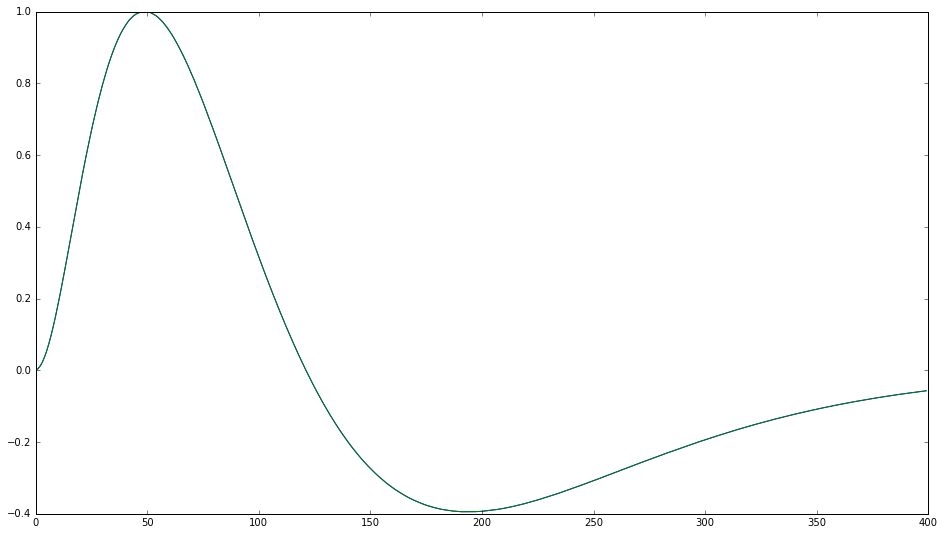

In [28]:
# Pedestal
print(ev.mc.tel[tel_id].pedestal[0])
print(ev.mc.tel[tel_id].pedestal[1])

# Gain
print(ev.mc.tel[tel_id].dc_to_pe[0])
print(ev.mc.tel[tel_id].dc_to_pe[1])

# ADC sums
print(ev.dl0.tel[tel_id].adc_sums[0])
print(ev.dl0.tel[tel_id].adc_sums[1])

print(ev.mc.tel[tel_id].photo_electron_image)

ev.mc.tel[tel_id].reference_pulse_shape.shape

plt.plot(ev.mc.tel[tel_id].reference_pulse_shape[0])
plt.plot(ev.mc.tel[tel_id].reference_pulse_shape[1])

# TODO!!!
#help(pyhessio)
#pedestal, gains = get_mc_calibration_data(tel_id)
#print("pedestal:", pedestal)
#print("gains:", gains)

### Cleaning algorithms

#### Tailcut

Ctapipe's implementation with:

- high threshold set to 10 PE
- low threshold set to 5 PE

Reference: https://arxiv.org/abs/astro-ph/0607333

#### Wavelets

- Cosmostat's Sparce2D (mr\_filter) "b-spline" wavelet transform
- Parameters detailled later

## Metrics

### $\mathcal{E}_{\text{shape}}$

$$
\mathcal{E}_{\text{shape}}(\hat{\boldsymbol{S}}, \boldsymbol{S}^*) = \left\langle \text{abs} \left( \frac{\hat{\boldsymbol{S}}}{\sum_i \hat{\boldsymbol{S}}_i} - \frac{\boldsymbol{S}^*}{\sum_i \boldsymbol{S}^*_i} \right) \right\rangle
$$

with:

- $\hat{\boldsymbol{S}}$ the algorithm's output image (i.e. the *cleaned* image);
- $\boldsymbol{S}^*$ the reference image (i.e. the *clean* image);
- $\langle \boldsymbol{S} \rangle$ the average of matrix $\boldsymbol{S}$.
- $\mathcal{E}_{\text{shape}}(\cdot, \cdot) \in \left[ 0, \frac{2}{\mbox{num_pixels}} \right]$

#### Theoritical maximum (wrost) value

$$
\frac{2}{\mbox{num_pixels}} = \frac{2}{40^2} = 0.00125
$$

Worst case is when no pixels are in common between the two images.
Because of the normalisation, the sum of all pixels value on each image is 1.
Thus the worst possible value is $\frac{1 + 1}{\mbox{num_pixels}}$

##### Example for images with 4 pixels

$$
\left\langle \text{abs}\left( \begin{bmatrix}
    0 & 1 \\
    0 & 0
\end{bmatrix}
-
\begin{bmatrix}
    0 & 0 \\
    1 & 0
\end{bmatrix} \right) \right\rangle
=
\left\langle \begin{bmatrix}
    0 & 1 \\
    1 & 0
\end{bmatrix} \right\rangle
=
0.5 = \frac{2}{\mbox{num_pixels}}
$$

##### Another image with 4 pixels

$$
\left\langle \text{abs}\left( \begin{bmatrix}
    0.5 & 0 \\
    0 & 0.5
\end{bmatrix}
-
\begin{bmatrix}
    0 & 0.5 \\
    0.5 & 0
\end{bmatrix} \right) \right\rangle
=
\left\langle \begin{bmatrix}
    0.5 & 0.5 \\
    0.5 & 0.5
\end{bmatrix} \right\rangle
=
0.5 = \frac{2}{\mbox{num_pixels}}
$$

##### Another image with 4 pixels

$$
\left\langle \text{abs}\left( \begin{bmatrix}
    0.75 & 0 \\
    0 & 0.25
\end{bmatrix}
-
\begin{bmatrix}
    0 & 0.25 \\
    0.75 & 0
\end{bmatrix} \right) \right\rangle
=
\left\langle \begin{bmatrix}
    0.75 & 0.25 \\
    0.75 & 0.25
\end{bmatrix} \right\rangle
=
0.5 = \frac{2}{\mbox{num_pixels}}
$$

##### For images with 9 pixels

$$
\left\langle \text{abs}\left( \begin{bmatrix}
    0 & 0 & 1\\
    0 & 0 & 0\\
    0 & 0 & 0\\
\end{bmatrix}
-
\begin{bmatrix}
    0 & 0 & 0\\
    0 & 0 & 0\\
    1 & 0 & 0\\
\end{bmatrix} \right) \right\rangle
=
\left\langle \begin{bmatrix}
    0 & 0 & 1\\
    0 & 0 & 0\\
    1 & 0 & 0\\
\end{bmatrix} \right\rangle
=
\frac{2}{9} = \frac{2}{\mbox{num_pixels}}
$$

### $\mathcal{E}_{\text{energy}}$ (relative total counts difference)

$$
\mathcal{E}_{\text{energy}}(\hat{\boldsymbol{S}}, \boldsymbol{S}^*) = \frac{ \text{abs} \left( \sum_i \hat{\boldsymbol{S}}_i - \sum_i \boldsymbol{S}^*_i \right) }{ \sum_i \boldsymbol{S}^*_i }
$$

with:

- $\hat{\boldsymbol{S}}$ the algorithm's output image (i.e. the *cleaned* image);
- $\boldsymbol{S}^*$ the reference image (i.e. the *clean* image).

## Results

Results are stored in the followed directory (on SAPCTA) in JSON files (structured results) and in CSV and FITS files (flattened results for Glueviz for instance):

```
sapcta:/dsm/manip/cta/xp_jd/2016_12_13/
```

## Input data study

### Total number of photoelectrons (NPE) per image

14899 images
min: 4.0
max: 160676.0
mean: 720.848379086


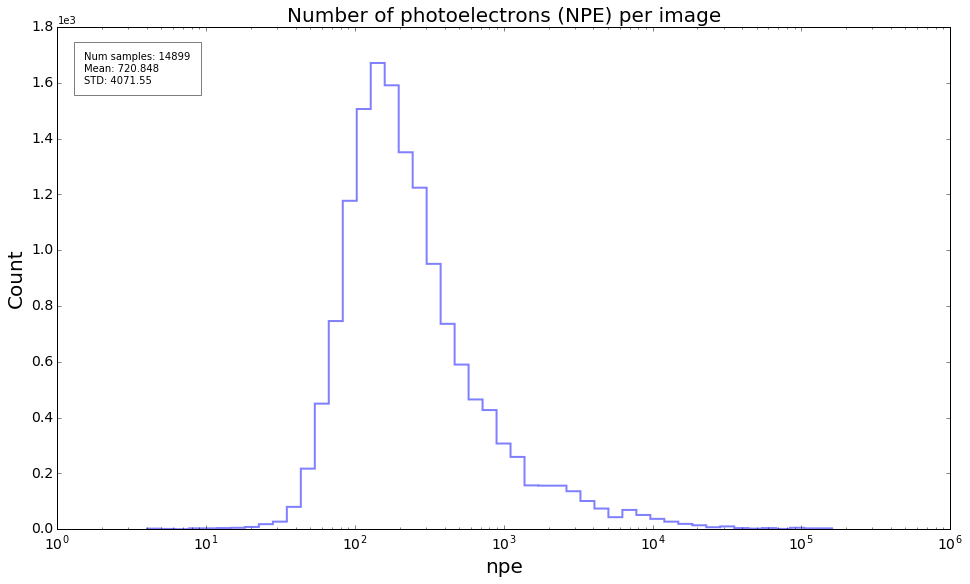

In [6]:
%run ./utils/plot_metadata_histogram.py --key=npe --logx --title="Number of photoelectrons (NPE) per image" ./xps/2017_02_04/score_gamma_all_null_ref.json

### Wavelets "reference" (the one presented in Bologna)

Full ``mr_filter`` setup:

- Wavelet function: bspline wavelet transform "a trous" algorithm (``-t2``)
- Coef. detection method: K-SigmaNoise Threshold (``-C1``)
- Type of filtering: Hard K-Sigma Thresholding (``-f1``)
- K-Sigma noise threshold: 3 (``-s3``)
- Noise model: Poisson noise + Gaussian noise (``-m3``)
- Number of scales: 4 (``-n4``)
- Suppress isolated pixels: yes (``-k``)
- Suppress last scale: yes (``-K``)

#### At very low energy (0 to 50 NPE)

##### $\mathcal{E}_{\text{shape}}$

In [ ]:
%run ./utils/plot_score_histogram.py --notebook --logy --metric e_shape --max-npe=50 --ratio ./score_gamma_all_wavelets_mrfilter_ref.json  ./score_gamma_all_tailcut_ref.json

##### $\mathcal{E}_{\text{energy}}$

In [ ]:
%run ./utils/plot_score_histogram.py --notebook --logy --metric e_energy --max-npe=50 --ratio ./score_gamma_all_wavelets_mrfilter_ref.json  ./score_gamma_all_tailcut_ref.json

##### $\Delta_{\psi}$

In [ ]:
%run ./utils/plot_score_histogram.py --notebook --logy --metric hillas2_delta_psi_norm --max-npe=50 --ratio ./score_gamma_all_wavelets_mrfilter_ref.json  ./score_gamma_all_tailcut_ref.json

#### At low energy (50 to 100 NPE)

##### $\mathcal{E}_{\text{shape}}$

In [ ]:
%run ./utils/plot_score_histogram.py --notebook --logy --metric e_shape --min-npe=50 --max-npe=100 --ratio ./score_gamma_all_wavelets_mrfilter_ref.json  ./score_gamma_all_tailcut_ref.json

##### $\mathcal{E}_{\text{energy}}$

In [ ]:
%run ./utils/plot_score_histogram.py --notebook --logy --metric e_energy --min-npe=50 --max-npe=100 --ratio ./score_gamma_all_wavelets_mrfilter_ref.json  ./score_gamma_all_tailcut_ref.json

##### $\Delta_{\psi}$

In [ ]:
%run ./utils/plot_score_histogram.py --notebook --logy --metric hillas2_delta_psi_norm --min-npe=50 --max-npe=100 --ratio ./score_gamma_all_wavelets_mrfilter_ref.json  ./score_gamma_all_tailcut_ref.json

#### At most represented bins (100 to 120 NPE)

##### $\mathcal{E}_{\text{shape}}$

In [ ]:
%run ./utils/plot_score_histogram.py --notebook --logy --metric e_shape --min-npe=100 --max-npe=120 --ratio ./score_gamma_all_wavelets_mrfilter_ref.json  ./score_gamma_all_tailcut_ref.json

##### $\mathcal{E}_{\text{energy}}$

In [ ]:
%run ./utils/plot_score_histogram.py --notebook --logy --metric e_energy --min-npe=100 --max-npe=120 --ratio ./score_gamma_all_wavelets_mrfilter_ref.json  ./score_gamma_all_tailcut_ref.json

##### $\Delta_{\psi}$

In [ ]:
%run ./utils/plot_score_histogram.py --notebook --logy --metric hillas2_delta_psi_norm --min-npe=100 --max-npe=120 --ratio ./score_gamma_all_wavelets_mrfilter_ref.json  ./score_gamma_all_tailcut_ref.json

#### At medium energy (120 to 1000 NPE)

##### $\mathcal{E}_{\text{shape}}$

In [ ]:
%run ./utils/plot_score_histogram.py --notebook --logy --metric e_shape --min-npe=120 --max-npe=1000 --ratio ./score_gamma_all_wavelets_mrfilter_ref.json  ./score_gamma_all_tailcut_ref.json

##### $\mathcal{E}_{\text{energy}}$

In [ ]:
%run ./utils/plot_score_histogram.py --notebook --logy --metric e_energy --min-npe=120 --max-npe=1000 --ratio ./score_gamma_all_wavelets_mrfilter_ref.json  ./score_gamma_all_tailcut_ref.json

##### $\Delta_{\psi}$

In [ ]:
%run ./utils/plot_score_histogram.py --notebook --logy --metric hillas2_delta_psi_norm --min-npe=120 --max-npe=1000 --ratio ./score_gamma_all_wavelets_mrfilter_ref.json  ./score_gamma_all_tailcut_ref.json

#### At high energy (1000 to 10000 NPE)

##### $\mathcal{E}_{\text{shape}}$

In [ ]:
%run ./utils/plot_score_histogram.py --notebook --logy --metric e_shape --min-npe=1000 --max-npe=10000 --ratio ./score_gamma_all_wavelets_mrfilter_ref.json  ./score_gamma_all_tailcut_ref.json

##### $\mathcal{E}_{\text{energy}}$

In [ ]:
%run ./utils/plot_score_histogram.py --notebook --logy --metric e_energy --min-npe=1000 --max-npe=10000 --ratio ./score_gamma_all_wavelets_mrfilter_ref.json  ./score_gamma_all_tailcut_ref.json

##### $\Delta_{\psi}$

In [ ]:
%run ./utils/plot_score_histogram.py --notebook --logy --metric hillas2_delta_psi_norm --min-npe=1000 --max-npe=10000 --ratio ./score_gamma_all_wavelets_mrfilter_ref.json  ./score_gamma_all_tailcut_ref.json

#### At very high energy (>=10000 NPE)

##### $\mathcal{E}_{\text{shape}}$

In [ ]:
%run ./utils/plot_score_histogram.py --notebook --logy --metric e_shape --min-npe=10000 --ratio ./score_gamma_all_wavelets_mrfilter_ref.json  ./score_gamma_all_tailcut_ref.json

##### $\mathcal{E}_{\text{energy}}$

In [ ]:
%run ./utils/plot_score_histogram.py --notebook --logy --metric e_energy --min-npe=10000 --ratio ./score_gamma_all_wavelets_mrfilter_ref.json  ./score_gamma_all_tailcut_ref.json

##### $\Delta_{\psi}$

In [ ]:
%run ./utils/plot_score_histogram.py --notebook --logy --metric hillas2_delta_psi_norm --min-npe=10000 --ratio ./score_gamma_all_wavelets_mrfilter_ref.json  ./score_gamma_all_tailcut_ref.json

#### Conclusion

"Epsilon shape" metric:
- Tailcut has more "good" results (on left of each histogram)
- But Wavelet has less "bad" results (on right of each histogram) at medium energy ranges (1 TeV to 100 TeV)

"Epsilon energy" metric:
- Tailcut has better results

### Kill islands (remove isolated pixels)

Full ``mr_filter`` setup:

- Wavelet function: bspline wavelet transform "a trous" algorithm (``-t2``)
- Coef. detection method: K-SigmaNoise Threshold (``-C1``)
- Type of filtering: Hard K-Sigma Thresholding (``-f1``)
- K-Sigma noise threshold: 3 (``-s3``)
- Noise model: Poisson noise + Gaussian noise (``-m3``)
- Number of scales: 4 (``-n4``)
- Suppress isolated pixels: yes (``-k``)
- Suppress last scale: yes (``-K``)

xmin: 0.000933499746425
xmax: 0.989473078511
ymin: 4.0
ymax: 160676.0
zmin: 0.0
zmax: 295.0
xmin: 0.000933499746425
xmax: 0.989473078511
ymin: 4.0
ymax: 160676.0
zmin: 0.0
zmax: 224.0


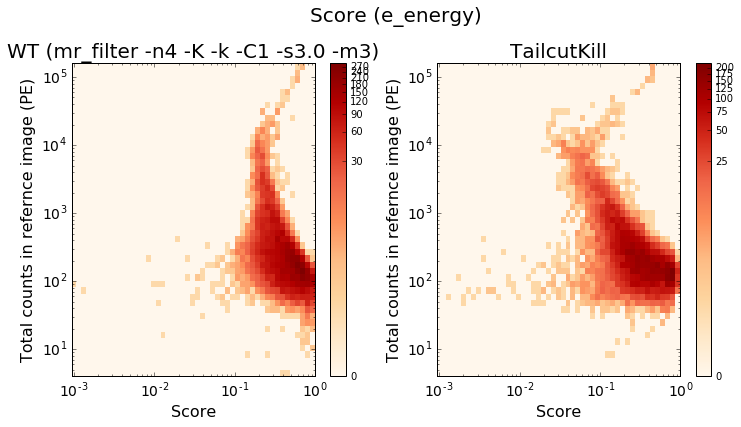

In [7]:
%run ./utils/plot_score_histogram2d.py --notebook --key npe --metric e_energy --logx --logy --logz ./xps/2017_02_04/score_gamma_all_wavelets_mrfilter_kill.json  ./xps/2017_02_04/score_gamma_all_tailcut_kill.json

xmin: -6.28207603785
xmax: 6.28102523112
ymin: 4.0
ymax: 160676.0
zmin: 0.0
zmax: 965.0
xmin: -6.28207603785
xmax: 6.28102523112
ymin: 4.0
ymax: 160676.0
zmin: 0.0
zmax: 870.0


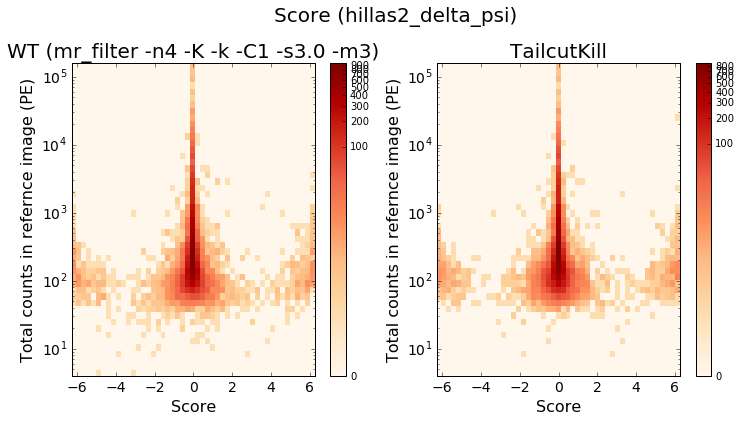

In [8]:
%run ./utils/plot_score_histogram2d.py --notebook --key npe --metric hillas2_delta_psi --logy --logz ./xps/2017_02_04/score_gamma_all_wavelets_mrfilter_kill.json  ./xps/2017_02_04/score_gamma_all_tailcut_kill.json

<img src="./figs/psi_wt_tc_2d_kill.png" width="90%">

#### At very low energy (0 to 50 NPE)

##### $\mathcal{E}_{\text{shape}}$

In [ ]:
%run ./utils/plot_score_histogram.py --notebook --logy --metric e_shape --max-npe=50 --ratio ./xps/2017_02_04/score_gamma_all_wavelets_mrfilter_kill.json  ./xps/2017_02_04/score_gamma_all_tailcut_kill.json

##### $\mathcal{E}_{\text{energy}}$

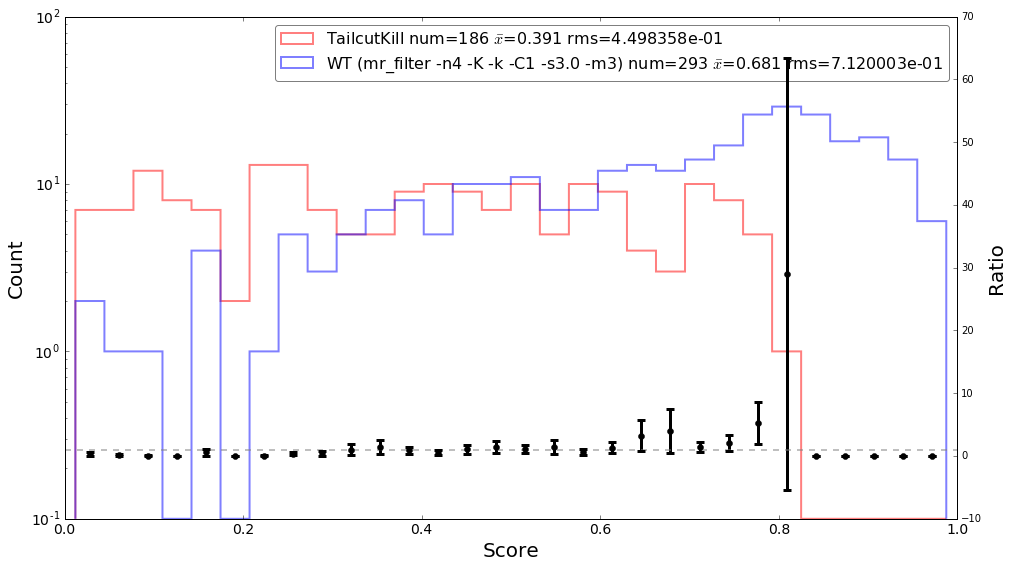

In [9]:
%run ./utils/plot_score_histogram.py --notebook --logy --metric e_energy --max-npe=50 --ratio ./xps/2017_02_04/score_gamma_all_wavelets_mrfilter_kill.json  ./xps/2017_02_04/score_gamma_all_tailcut_kill.json

##### $\Delta_{\psi}$

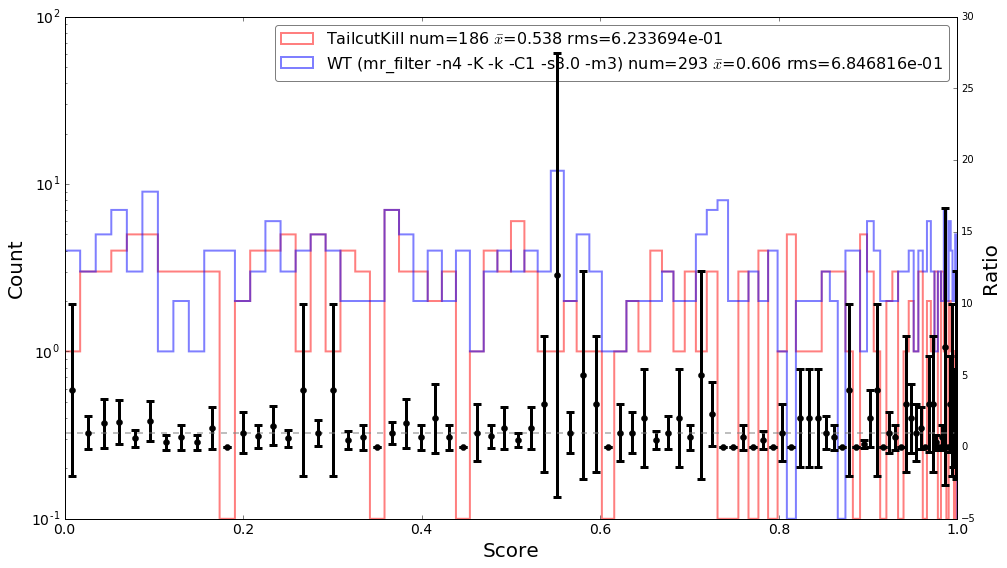

In [10]:
%run ./utils/plot_score_histogram.py --notebook --logy --degx --metric hillas2_delta_psi_norm --max-npe=50 --ratio ./xps/2017_02_04/score_gamma_all_wavelets_mrfilter_kill.json  ./xps/2017_02_04/score_gamma_all_tailcut_kill.json

#### At low energy (50 to 100 NPE)

##### $\mathcal{E}_{\text{shape}}$

In [ ]:
%run ./utils/plot_score_histogram.py --notebook --logy --metric e_shape --min-npe=50 --max-npe=100 --ratio ./xps/2017_02_04/score_gamma_all_wavelets_mrfilter_kill.json  ./xps/2017_02_04/score_gamma_all_tailcut_kill.json

##### $\mathcal{E}_{\text{energy}}$

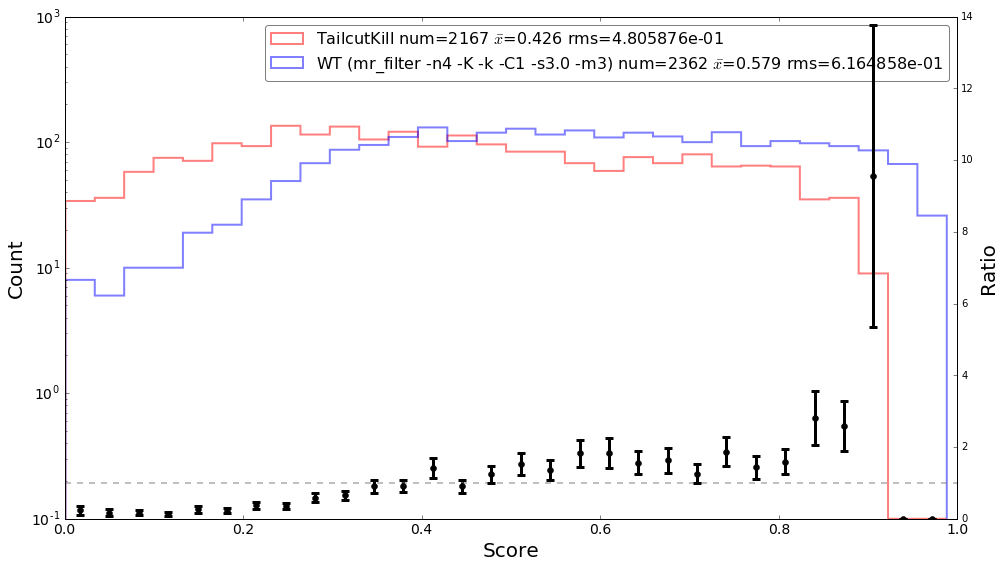

In [11]:
%run ./utils/plot_score_histogram.py --notebook --logy --metric e_energy --min-npe=50 --max-npe=100 --ratio ./xps/2017_02_04/score_gamma_all_wavelets_mrfilter_kill.json  ./xps/2017_02_04/score_gamma_all_tailcut_kill.json

##### $\Delta_{\psi}$

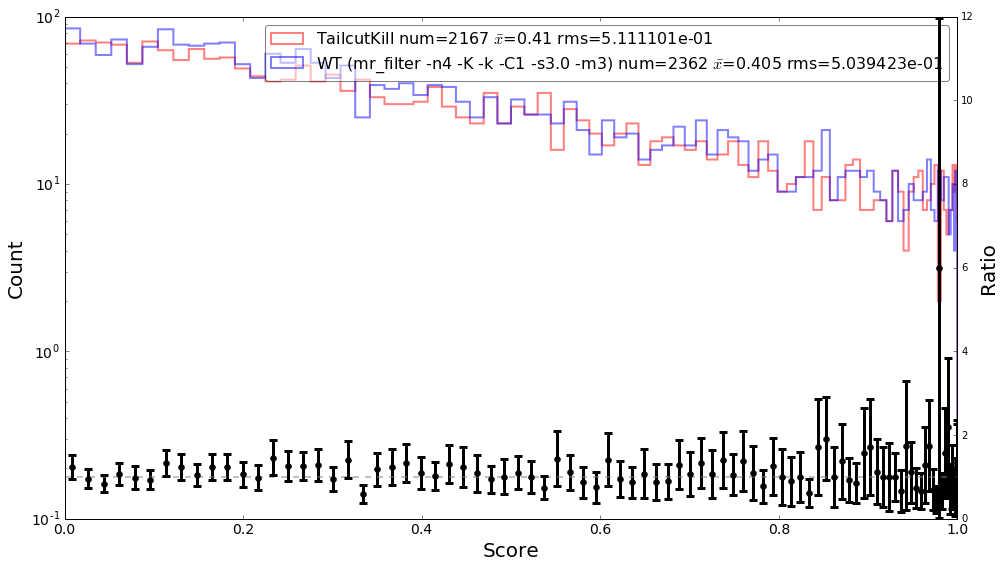

In [12]:
%run ./utils/plot_score_histogram.py --notebook --logy --degx --metric hillas2_delta_psi_norm --min-npe=50 --max-npe=100 --ratio ./xps/2017_02_04/score_gamma_all_wavelets_mrfilter_kill.json  ./xps/2017_02_04/score_gamma_all_tailcut_kill.json

#### At most represented bins (100 to 120 NPE)

##### $\mathcal{E}_{\text{shape}}$

In [ ]:
%run ./utils/plot_score_histogram.py --notebook --logy --metric e_shape --min-npe=100 --max-npe=120 --ratio ./xps/2017_02_04/score_gamma_all_wavelets_mrfilter_kill.json  ./xps/2017_02_04/score_gamma_all_tailcut_kill.json

##### $\mathcal{E}_{\text{energy}}$

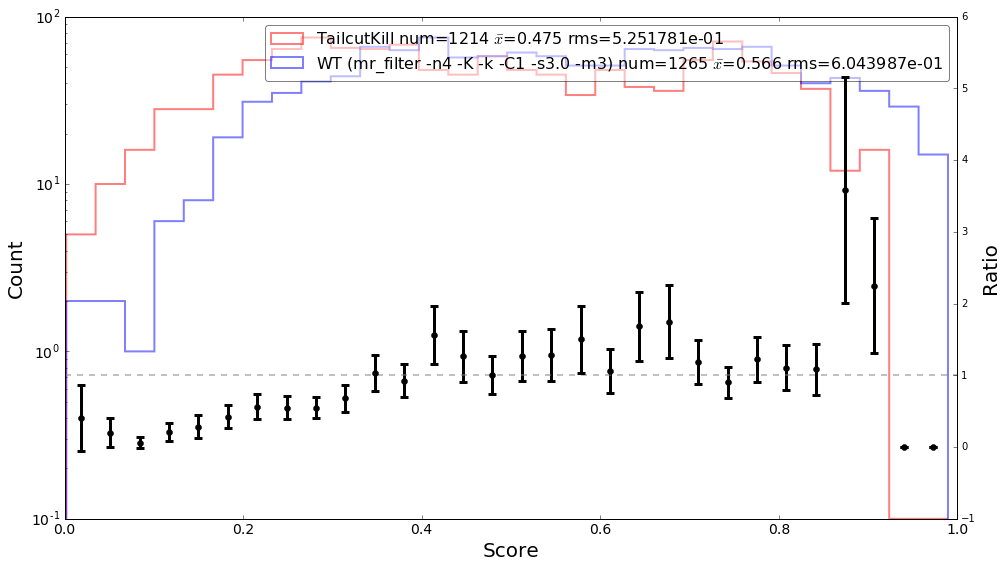

In [13]:
%run ./utils/plot_score_histogram.py --notebook --logy --metric e_energy --min-npe=100 --max-npe=120 --ratio ./xps/2017_02_04/score_gamma_all_wavelets_mrfilter_kill.json  ./xps/2017_02_04/score_gamma_all_tailcut_kill.json

##### $\Delta_{\psi}$

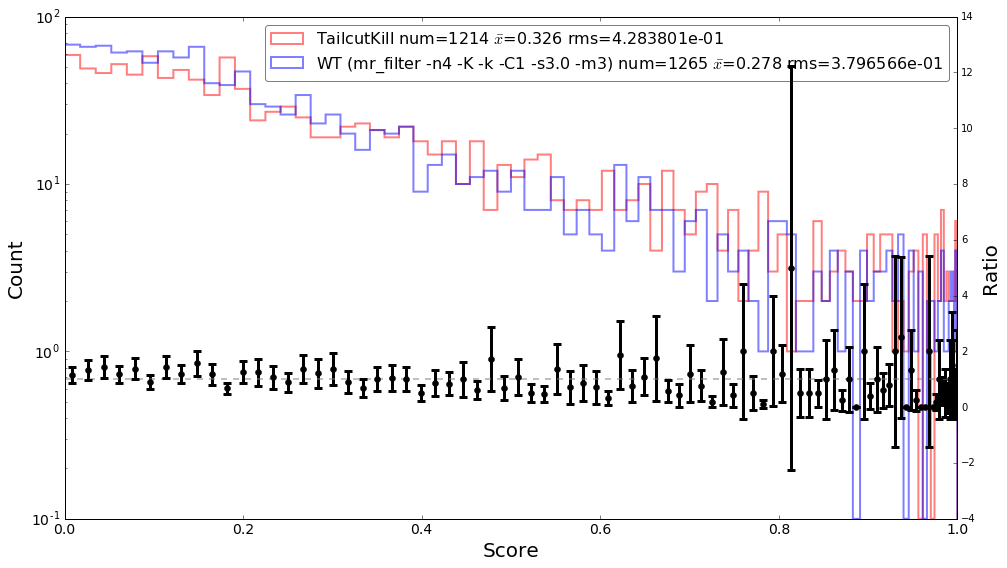

In [14]:
%run ./utils/plot_score_histogram.py --notebook --logy --degx --metric hillas2_delta_psi_norm --min-npe=100 --max-npe=120 --ratio ./xps/2017_02_04/score_gamma_all_wavelets_mrfilter_kill.json  ./xps/2017_02_04/score_gamma_all_tailcut_kill.json

#### At medium energy (120 to 1000 NPE)

##### $\mathcal{E}_{\text{shape}}$

In [ ]:
%run ./utils/plot_score_histogram.py --notebook --logy --metric e_shape --min-npe=120 --max-npe=1000 --ratio ./xps/2017_02_04/score_gamma_all_wavelets_mrfilter_kill.json  ./xps/2017_02_04/score_gamma_all_tailcut_kill.json

##### $\mathcal{E}_{\text{energy}}$

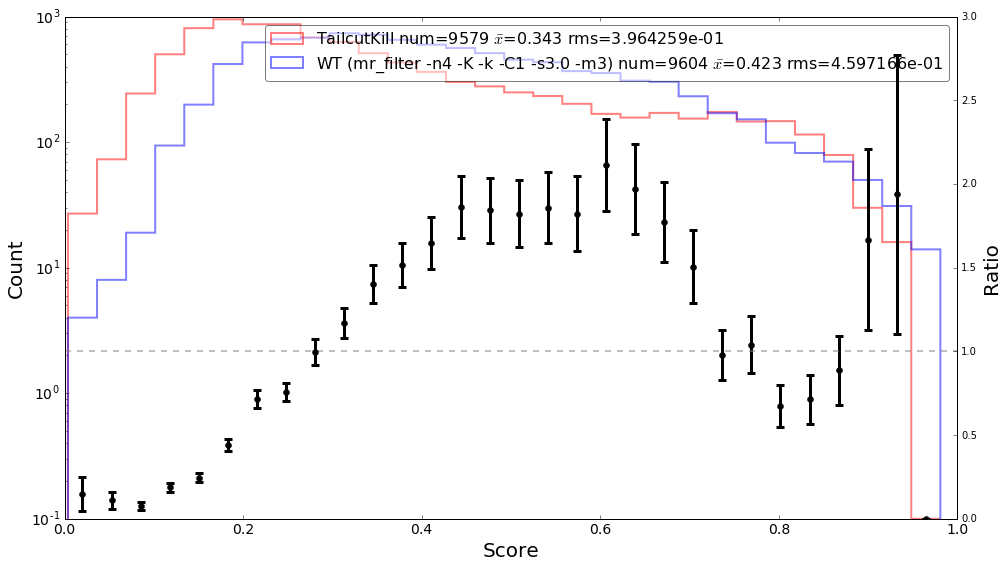

In [15]:
%run ./utils/plot_score_histogram.py --notebook --logy --metric e_energy --min-npe=120 --max-npe=1000 --ratio ./xps/2017_02_04/score_gamma_all_wavelets_mrfilter_kill.json  ./xps/2017_02_04/score_gamma_all_tailcut_kill.json

##### $\Delta_{\psi}$

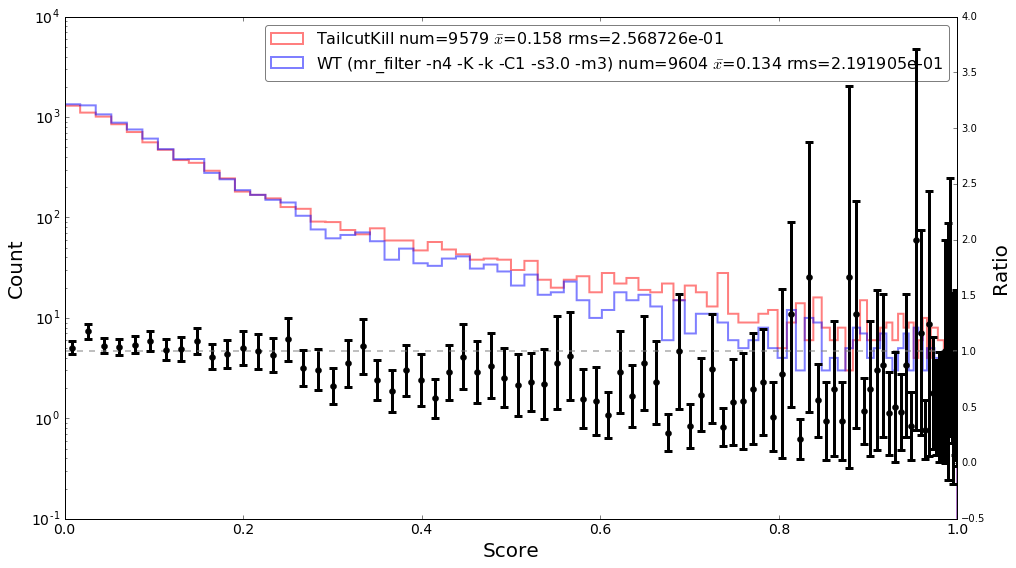

In [16]:
%run ./utils/plot_score_histogram.py --notebook --logy --degx --metric hillas2_delta_psi_norm --min-npe=120 --max-npe=1000 --ratio ./xps/2017_02_04/score_gamma_all_wavelets_mrfilter_kill.json  ./xps/2017_02_04/score_gamma_all_tailcut_kill.json

#### At high energy (1000 to 10000 NPE)

##### $\mathcal{E}_{\text{shape}}$

In [ ]:
%run ./utils/plot_score_histogram.py --notebook --logy --metric e_shape --min-npe=1000 --max-npe=10000 --ratio ./xps/2017_02_04/score_gamma_all_wavelets_mrfilter_kill.json  ./xps/2017_02_04/score_gamma_all_tailcut_kill.json

##### $\mathcal{E}_{\text{energy}}$

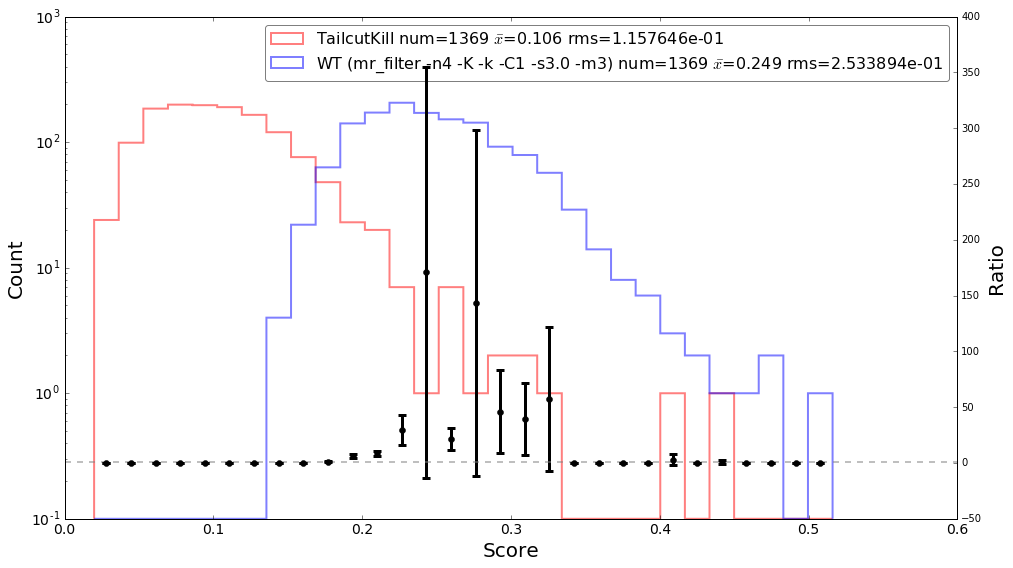

In [17]:
%run ./utils/plot_score_histogram.py --notebook --logy --metric e_energy --min-npe=1000 --max-npe=10000 --ratio ./xps/2017_02_04/score_gamma_all_wavelets_mrfilter_kill.json  ./xps/2017_02_04/score_gamma_all_tailcut_kill.json

##### $\Delta_{\psi}$

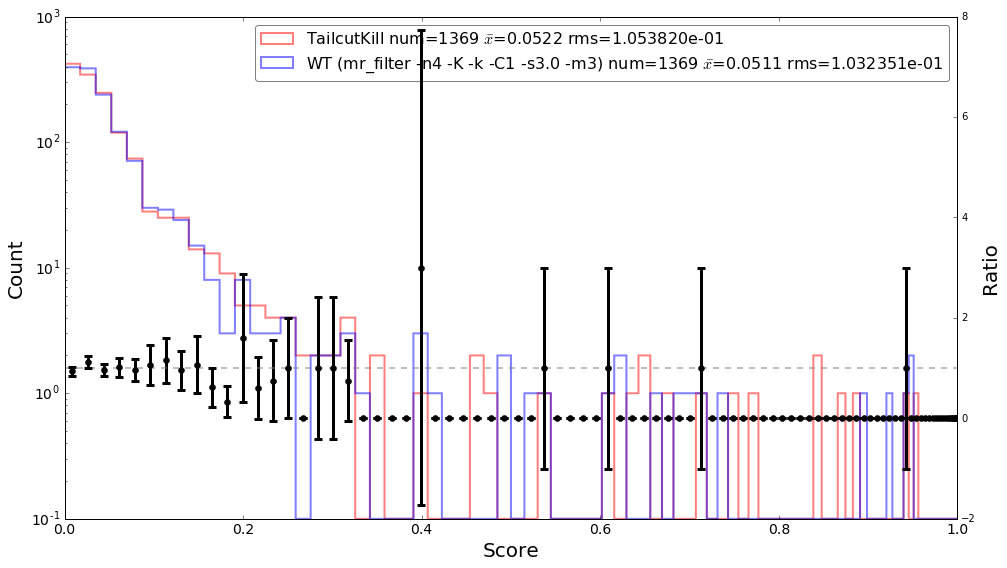

In [18]:
%run ./utils/plot_score_histogram.py --notebook --logy --degx --metric hillas2_delta_psi_norm --min-npe=1000 --max-npe=10000 --ratio ./xps/2017_02_04/score_gamma_all_wavelets_mrfilter_kill.json  ./xps/2017_02_04/score_gamma_all_tailcut_kill.json

#### At very high energy (>=10000 NPE)

##### $\mathcal{E}_{\text{shape}}$

In [ ]:
%run ./utils/plot_score_histogram.py --notebook --logy --metric e_shape --min-npe=10000 --ratio ./xps/2017_02_04/score_gamma_all_wavelets_mrfilter_kill.json  ./xps/2017_02_04/score_gamma_all_tailcut_kill.json

##### $\mathcal{E}_{\text{energy}}$

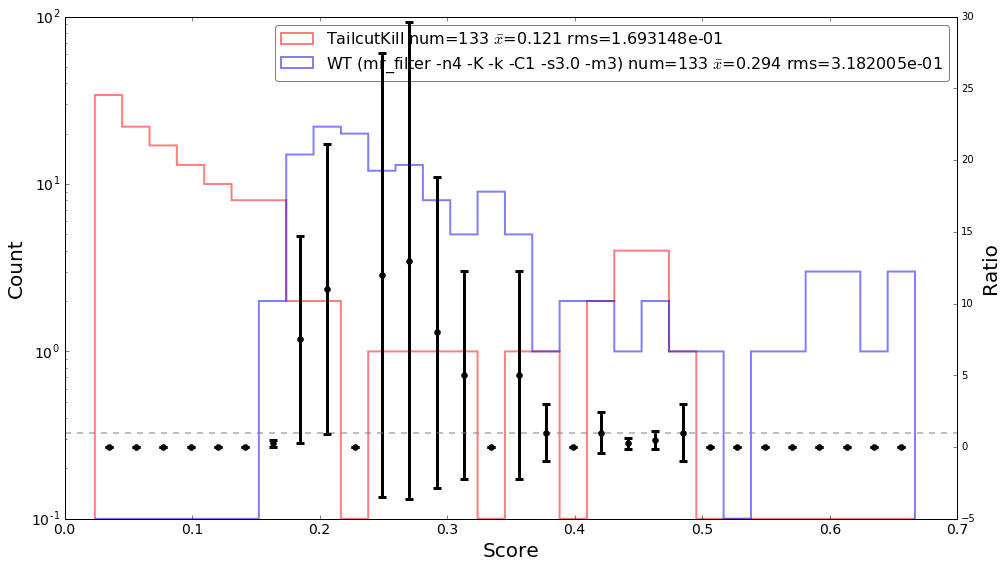

In [19]:
%run ./utils/plot_score_histogram.py --notebook --logy --metric e_energy --min-npe=10000 --ratio ./xps/2017_02_04/score_gamma_all_wavelets_mrfilter_kill.json  ./xps/2017_02_04/score_gamma_all_tailcut_kill.json

##### $\Delta_{\psi}$

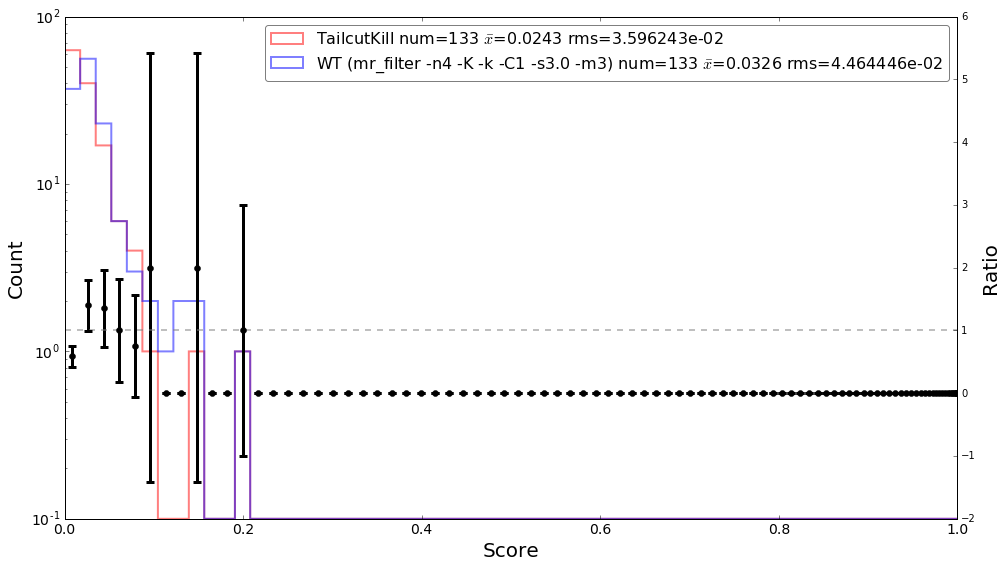

In [20]:
%run ./utils/plot_score_histogram.py --notebook --logy --degx --metric hillas2_delta_psi_norm --min-npe=10000 --ratio ./xps/2017_02_04/score_gamma_all_wavelets_mrfilter_kill.json  ./xps/2017_02_04/score_gamma_all_tailcut_kill.json

##### First bin

In [3]:
%run ./utils/first_bin_ratio.py --angle=0.2 --min-npe=50 --max-npe=10000 --metric hillas2_delta_psi_norm ./xps/2017_02_04/score_gamma_all_wavelets_mrfilter_kill.json  ./xps/2017_02_04/score_gamma_all_tailcut_kill.json

Parsing ./xps/2017_02_04/score_gamma_all_wavelets_mrfilter_kill.json...
11085 images
Parsing ./xps/2017_02_04/score_gamma_all_tailcut_kill.json...
11721 images
[8848]
[9088]
ratio: [ 0.97359155]
error: [ 0.02056308]
bins: [ 0.          0.00349065]


The cell above with --min-npe and --max-npe is wrong... should use sum of PE for cleaned images, note ref image...

In [30]:
%run ./utils/first_bin_ratio.py --angle=0.2 --metric hillas2_delta_psi_norm ./xps/2017_02_04/score_gamma_all_wavelets_mrfilter_kill.json  ./xps/2017_02_04/score_gamma_all_tailcut_kill.json

Parsing ./xps/2017_02_04/score_gamma_all_wavelets_mrfilter_kill.json...
14899 images
Parsing ./xps/2017_02_04/score_gamma_all_tailcut_kill.json...
14899 images
[10567]
[9912]
ratio: [ 1.06608152]
error: [ 0.02107889]
bins: [ 0.          0.00349065]


In [36]:
%run ./utils/first_bin_ratio.py --angle=0.2 --metric hillas2_delta_psi_norm ./xps/2017_02_04/score_gamma_all_wavelets_mrfilter_kill.json  ./xps/2017_02_04/score_gamma_all_tailcut_kill.json

Parsing ./xps/2017_02_04/score_gamma_all_wavelets_mrfilter_kill.json...
14899 images
Parsing ./xps/2017_02_04/score_gamma_all_tailcut_kill.json...
14899 images
[10567]
[9912]
ratio: [ 1.06608152]
error: [ 0.02107889]
bins: [ 0.          0.00349065]


In [37]:
%run ./utils/first_bin_ratio.py --angle=0.4 --metric hillas2_delta_psi_norm ./xps/2017_02_09/score_gamma_all_wavelets_mrfilter_kill.json  ./xps/2017_02_04/score_gamma_all_tailcut_kill.json

Parsing ./xps/2017_02_09/score_gamma_all_wavelets_mrfilter_kill.json...
14899 images
Parsing ./xps/2017_02_04/score_gamma_all_tailcut_kill.json...
14899 images
[727]
[11748]
ratio: [ 0.06188287]
error: [ 0.00286605]
bins: [ 0.          0.00698126]


In [38]:
%run ./utils/first_bin_ratio.py --angle=0.4 --metric hillas2_delta_psi_norm ./xps/2017_02_10/score_gamma_all_wavelets_mrfilter_fabio.json  ./xps/2017_02_04/score_gamma_all_tailcut_kill.json

Parsing ./xps/2017_02_10/score_gamma_all_wavelets_mrfilter_fabio.json...
14899 images
Parsing ./xps/2017_02_04/score_gamma_all_tailcut_kill.json...
14899 images
[810]
[11748]
ratio: [ 0.06894791]
error: [ 0.0030587]
bins: [ 0.          0.00698126]


#### Conclusion

Avec l'option kill island activée pour Wavelets et pour Tailcut:

Pour un delta $\psi$ compris entre 0 et 0.2°:
- 8.6% pour le premier bin pour NPE dans [50, 10000] (err=0.11 avec 377 images et 347 images dans le premier bin respectivement pour Wavelets et Tailcuts)

### Perpendicular hit distribution

#### SumPE in [50 ; 1000]

#### SumPE in [1000 ; 10000]

#### SumPE in [10000 ; 50000]

### Wavelets with FDR threshold ("-C2" option)

Full mr_filter setup:
```none
Wavelet function: bspline wavelet transform "a trous" algorithm (-t2)
Coef. detection method: FDR (-C2)
Type of filtering: Hard K-Sigma Thresholding (-f1)
Noise model: Poisson noise + Gaussian noise (-m3)
Number of scales: 4 (-n4)
Suppress isolated pixels: yes (-k)
Suppress last scale: yes (-K)
```

~~

- Among the parameters I tested, I show this one (recomanded by Sandrine)
- FDR means False Discovery Rate,
- it's an adaptive methode to discover the best threshold value for each plane

#### Epsilon shape

![image](./figs/wt_ref_vs_wt_c2_eshape.png)

~~

- Here we compare:
    - this wavelet "reference" (in blue)
    - with the wavelet using FDR (in green)
- according to the "Epsilon shape" metric
- We have slightly better results without FDR than with FDR

#### Epsilon energy

![image](./figs/wt_ref_vs_wt_c2_eenergy.png)

#### Examples

- TODO: add image examples...

#### Conclusion

FDR doesn't seem to be a good idea for our setup

### Hillas parameters metric $\Delta_{\theta}$

#### Definition

Compute the score of *cleaned image* regarding *reference image* with the Hillas
parameter theta:

$$\Delta_{\theta} = \theta_\text{ref} - \theta_\text{cleaned}$$

#### Wavelets "reference"

![image](./figs/tc_vs_wt_ref_theta.png)

~~

- Here we compare Tailcut reference and Wavelet "reference"
- with this new metric
- The more we have counts around 0, 180 and -180 the better we are
- The less we have counts around 90 and -90 the better we are
- Results: Tailcut has better results than Wavelet reference

#### Wavelets with FDR threshold ("-C2" option)

![image](./figs/tc_vs_wt_c2_theta.png)

~~

- Results: Tailcut has better results than Wavelet with FDR

#### Conclusion

Tailcut has better results than Wavelet reference and Wavelet with FDR

~~

But we will see later that this conclusion will be reversed with an extra option

### Kill isolated pixels

mr_filter's "-k" option doesn't work properly

#### Failure example

<img src="./figs/kill_isolated_pixels/ev458109_tel1.png" width="85%">

<img src="./figs/kill_isolated_pixels/ev64302_tel1.png" width="85%">

<img src="./figs/kill_isolated_pixels/ev481109_tel1_log.png" width="85%">

#### Fix

To fix that, I added a function that removes remaining isolated pixels (based on scipy like Fabio did).

This function is activated by the "--kill-isolated-pixels" option in

```
*./datapipe/denoising/wavelets\_mrfilter.py*
```

#### Fixed example

<img src="./figs/kill_isolated_pixels/ev458109_tel1_kill.png" width="85%">
<img src="./figs/kill_isolated_pixels/ev458109_tel1.png" width="85%">

<img src="./figs/kill_isolated_pixels/ev64302_tel1_kill.png" width="85%">
<img src="./figs/kill_isolated_pixels/ev64302_tel1.png" width="85%">

<img src="./figs/kill_isolated_pixels/ev481109_tel1_log_kill.png" width="85%">
<img src="./figs/kill_isolated_pixels/ev481109_tel1_log.png" width="85%">

#### Results

![image](./figs/wt_ref_vs_wt_kill_eshape.png)

- This new option slightly reduce the number of bad results with epsilon shape

##### Impact on results (VS WT ref.)

![image](./figs/wt_ref_vs_wt_kill_eenergy.png)

~~

- Strangely this option has a negative impact on results according to epsilon energy...

##### Impact on results (VS WT ref.)

![image](./figs/wt_ref_vs_wt_kill_theta.png)

~~

- ... but it has a very positive impact on results according to Hillas theta metric

##### Impact on results (VS WT with FDR threshold)

![image](./figs/wt_ref_vs_wt_c2_kill_eshape.png)

~~

- We have the same conclusion with FDR than with the wavelet reference:
- the new option slightly reduce the number of bad results with epsilon shape...

##### Impact on results (VS WT with FDR threshold)

![image](./figs/wt_ref_vs_wt_c2_kill_eenergy.png)

~~

- ... and again it has a negative impact on results according to epsilon energy...

##### Impact on results (VS WT with FDR threshold)

![image](./figs/wt_ref_vs_wt_c2_kill_theta.png)

~~

- ... but it has a very positive impact on results according to Hillas theta metric

##### Impact on results (VS  Tailcut)

![image](./figs/tc_vs_wt_kill_eshape.png)

~~

- When we compare with Tailcut,
- the new option doesn't change results according to epsilon shape metric: Tailcut is still better

##### Impact on results (VS  Tailcut)

![image](./figs/tc_vs_wt_kill_eenergy.png)

~~

- ditto for epsilon energy metric: Tailcut is still better

##### Impact on results (VS  Tailcut)

![image](./figs/tc_vs_wt_kill_theta.png)

~~

- but Tailcut is beaten according to Hillas Theta metric!

##### Conclusion

This fix ("--kill-isolated-pixels"):

- has very little impact with $\mathcal{E}_{\text{shape}}$
- has a negative impact with $\mathcal{E}_{\text{energy}}$
- gives clearly better results with $\Delta_{\theta}$
- gives clearly better results by eye

**According to $\Delta_{\theta}$, Wavelet transform
gives better results than Tailcut with this fix!** (especially between 1 and 10 TeV)

This partly explains why results are bad with pixel based metrics but are good
with reconstruction and high level physics metrics (as Tino used a similar
method in his experiments)

### Is FDR option better according to $\Delta_{\theta}$ ?

![image](./figs/wt_ref_vs_wt_c2_theta.png)

No...

### Hillas parameters metric revisited ($\Delta_{\theta}2$)

In this case, "--kill-isolated-pixels" is applied to the reference
images (see next section).

##### Impact on results (VS WT ref. + Kill isolated pixels)

![image](./figs/wt_ref_vs_wt_kill_theta2.png)
![image](./figs/wt_ref_vs_wt_kill_theta.png)

##### Impact on results (VS WT with FDR threshold + Kill isolated pixels)

![image](./figs/wt_ref_vs_wt_c2_kill_theta2.png)
![image](./figs/wt_ref_vs_wt_c2_kill_theta.png)

##### Wavelets "reference"

![image](./figs/tc_vs_wt_ref_theta2.png)
![image](./figs/tc_vs_wt_ref_theta.png)

##### Wavelets with FDR threshold ("-C2" option)

![image](./figs/tc_vs_wt_c2_theta2.png)
![image](./figs/tc_vs_wt_c2_theta.png)

##### Impact on results (VS  Tailcut + Kill isolated pixels)

![image](./figs/tc_vs_wt_kill_theta2.png)
![image](./figs/tc_vs_wt_kill_theta.png)

#### Conclusion

Results are roughly the same with $\Delta_{\theta}2$ than with $\Delta_{\theta}$

### Number of dropped images

Images returned by cleaning methods are dropped when they are completely empty
(to avoid division by zero in some metrics).

Total number of input images for presented results: 14899

```
find ~/astri_data/fits/gamma/ -type f -name "*.fits" 2> /dev/null | wc -l
cut -s -d , -f 1 score_gamma_all.csv | grep "FILE_NAME.json" | wc -l
```

| File                                               | Num. images | Dropped images |
| -------------------------------------------------- | -----------:| --------------:|
| score_gamma_all_tailcut_ref.json                   | 14528       | 371            |
| score_gamma_all_wavelets_mrfilter_ref.json         | 14894       | 5              |
| score_gamma_all_wavelets_mrfilter_kill.json        | 14894       | 5              |
| score_gamma_all_wavelets_mrfilter_c2.json          | 14639       | 260            |
| score_gamma_all_wavelets_mrfilter_c2_kill.json     | 14639       | 260            |
| score_gamma_all_wavelets_mrfilter_kill_offset.json | 12352       | 2547           |


## Logarithmic and square root images

When applying an offset (10 PE) and a logarithmic (or square root)
transformation on the input image image (and the inverses
transformations after cleaning on output images).


### Example 1

<img src="./figs/lip1.svg" width="100%">

### Example 2

<img src="./figs/lip2.svg" width="100%">

### Conclusion

As is, it doesn't work

## Consistency with Tino's results

### On small set of images

Tested on a set of 5 images (event \#100):

    Tel 9:
        E_energy TC: 0.23361876971918988
        E_energy WT: 0.34390493542761413

    Tel 14:
        E_energy TC: 0.18085652413547679
        E_energy WT: 0.22658406662684616

    Tel 17:
        E_energy TC: 0.13956736034362127
        E_energy WT: 0.24204471371821221

    Tel 25:
        E_energy TC: 0.25076103102349279
        E_energy WT: 0.4738171241645302

Data:

```
~/git/pub/jdhp-sap/sap-cta-data-pipeline/testset/gamma/ev100
```

Params:

```
mr_filter -K -k -C1 -m3 -s3 -n4
```

Resluts are exaclty the same in tino\_cta and sap-cta-data-pipeline.

But...


### On all images

![image](./figs/wt_ref_jd.png)

![image](./figs/wt_ref_tino.png)

## Perpendicular hit distribution

## Noise (NSB, electronic noise, ...)

Here is is plotted:

```
input_image - reference_image
```

### Noise histogram for telescope 1

In [ ]:
%run ./utils/plot_noise_histogram.py --notebook --logy ./testset/gamma/tel1/

### Noise histogram for telescope 2

In [ ]:
%run ./utils/plot_noise_histogram.py --notebook --logy ./testset/gamma/tel2/

We can observe some "stranges" values << 0.
This can be explained by the electronic saturation on images with $\sum NPE \gt 10000$.

On those images, *NPE input_image* << *NPE reference_image*, thus:

```
input_image - reference_image << 0
```

### Noise histogram for some events

![image](./figs/noise_histogram_ev507_tel1.png)

![image](./figs/noise_histogram_ev1909_tel1.png)

![image](./figs/noise_histogram_ev2403_tel1.png)

### Noise

Not a friendly distribution for Sparce2D (negative values)

## Default wavelet implemetation (Bspline "a trou")

### *mr_transform()* function

Implemented in *~/bin/isap/cxx/sparse2d/src/libsparse2d/MR_Trans.cc*

```cpp
static void mr_transform (Ifloat &Image,
                          MultiResol &MR_Transf,
                          Bool EdgeLineTransform,
                          type_border Border,
                          Bool Details) {
    // [...]
    MR_Transf.band(0) = Image;
    for (s = 0; s < Nbr_Plan -1; s++) {
       smooth_bspline (MR_Transf.band(s),MR_Transf.band(s+1),Border,s);
       MR_Transf.band(s) -= MR_Transf.band(s+1);
    }
    // [...]
}
```

<img src="./figs/wt_bspline.tex.svg" width="90%">

*convolve()* function is implemented in *smooth_bspline()* in sparce2d

### *smooth_bspline()* function

Implemented in *isap/cxx/sparse2d/src/libsparse2d/IM_Smooth.cc*

```cpp
void smooth_bspline (const Ifloat & Im_in,
                     Ifloat &Im_out,
                     type_border Type, int Step_trou) {
    int Nl = Im_in.nl();
    int Nc = Im_in.nc();
    int i,j,Step;
    float Coeff_h0 = 3. / 8.;
    float Coeff_h1 = 1. / 4.;
    float Coeff_h2 = 1. / 16.;
    Ifloat Buff(Nl,Nc,"Buff smooth_bspline");

    Step = (int)(pow((double)2., (double) Step_trou) + 0.5);

    for (i = 0; i < Nl; i ++)
    for (j = 0; j < Nc; j ++)
       Buff(i,j) = Coeff_h0 *    Im_in(i,j)
                 + Coeff_h1 * (  Im_in (i, j-Step, Type) 
                               + Im_in (i, j+Step, Type)) 
                 + Coeff_h2 * (  Im_in (i, j-2*Step, Type) 
                               + Im_in (i, j+2*Step, Type));

    for (i = 0; i < Nl; i ++)
    for (j = 0; j < Nc; j ++)
       Im_out(i,j) = Coeff_h0 *    Buff(i,j)
                   + Coeff_h1 * (  Buff (i-Step, j, Type) 
                                 + Buff (i+Step, j, Type)) 
                   + Coeff_h2 * (  Buff (i-2*Step, j, Type) 
                                 + Buff (i+2*Step, j, Type));
}
```

Good for:
- Kai tests (wrapper)
- Hexagonal shape cameras
- Logarithmic image processing studies

The implementation is simpler than what I thought
and it is conceptually easy to adapt it to hexagonal pixel shapes cameras

### Loss of energy on very high energy images (> 10000 pe)

#### Problem description

On images with NPE > 10000, we lose a lot of energy i.e. on $\mathcal{E}_{\text{energy}}$ 2D histograms, performance of cleaning algorithms decrease strongly at high NPE.

Yeah... but actualy Tailcut has the same problem.

#### Conclusion [2017-02-01]

Actually, the cut on very high pixel values is already done within calibrated **input** images...
Thus of course, no cleaning algorithm can retrive them.

The electronic simply saturates (~"the ADC has a 11 bits buffer"~) and there is nothing we can do about this...
We should drop those images.

### 8 Fevrier 2017

#### Minutes

"The fact that the total number of pe is systematically lower in wavelet makes a cut on pesum (sum of pe in the denoised event) biasing the comparison : a low pesum cut always select more WT than TC. However as it is shown these extra events are purely accidental since at low pesum any δψ is allowed."

"He shows result using the total number of pe (pesum) in the Monte Carlo image (Reference image) that gives good result for WT. However this variable is not available in real data and cannot be used"

#### Mail

Des chiffres sans coupures sur pe n'ont AUCUN sens sauf à montrer que les distributions respectives peuvent être comparées...

#### To sum up

Les faits:
* WT fait baisser les PE
* Il y a beaucoup plus d'images à faible $\sum PE_{ref}$ que d'images à fort $\sum PE_{ref}$ ("energy spectrum in e minus 2")

Qu'est-ce qu'on mesure:
* $\Delta_{\psi 1}$ : le nombre d'images qui ont un angle $\Delta_{\psi}$ "correct" (e.g. <0.2°)

Contexte:
* Les ev. à haute énergie et basse énergie doivent être jetés
    * pour les hautes énergies à cause de la saturation électronique
    * pour les basses énergies car elles sont en dessous de ce que peut détecter convenablement le telescope, le rapport signal sur bruit est trop faible et les résultats du cleaning aléatoires (???) 
* Ne pas faire de coupes sur le PE n'est pas correcte car
    * on considère ces résultats qui n'ont pas de sens (car ils sont issues d'images qui vont au-dela des spec du telescope) et qui devraient être jetés (oui mais pas sûre que ça ait un réel impact sur $\Delta_{\psi 1}$)
    * *ça n'a aucun sens sauf à montrer que les distributions respectives peuvent être comparées...*
        * ce qui ce passe est qu'on considère plein d'images pourries, à basse énergie ces images sont jetés par TC (seulement si pemax < 10... est-ce qu'il y en a vraiment tant que ça ???) mais pas par WT et il se peut que certaines donnent quand même de bons résultats par hasard et ces bons résultats par hasard font augmenter le score de WT pour $\Delta_{\psi 1}$
        * mais est-ce qu'il y a vraiment tant d'images que ça qui ont un pemax < 10... ???
        * et sur ces images pemax < 10, combien offrent de bons résultats à WT pour $\Delta_{\psi 1}$ ??? la proba pour avoir par hasard $\Delta_{\psi 1} < 0.2°$ est quand même très faible...
            * Th: "si ce faible pourcentage suffit, on passe de 200 à 212 et c'est ce qui nous fait passer de 0% à 6%"

Le problème: comment les enlever correctement ?
* faire une coupure sur "$\sum PE_{ref}$" (ou "$\max PE_{ref}$") n'est pas correct car en condition réel on ne connait pas cette donnée
    * ok mais là on veut juste comparer à priori deux algos
        * oui mais en condition réelle on va aussi devoir faire des coupes, les coupures se feront sur "$\sum PE_{cleaned}$" (ou "$\max PE_{cleaned}$") et le seuil des coupures va être un peu plus bas or ...
            * ???
* appliquer les mêmes seuils de coupure sur "$\sum PE_{ref}$" (ou "$\max PE_{ref}$") et "$\sum PE_{cleaned}$" (ou "$\max PE_{cleaned}$") n'est pas correct car les distributions ne sont pas comparables, il y aura plus de WT à "basse énergie" que de TC
    * ???

Les questions:
* "$\sum PE_{ref}$" ou "$\max PE_{ref}$" ?